In [85]:
import pandas as pd
import numpy as np
import glob, pyedflib, re, os, math
import matplotlib.pyplot as plt

In [208]:
DATA_DIR = '/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie'
CHANNELS = np.array(['A1-RF', 'A2-RF', 'C3-RF', 'C4-RF', 'Cz-RF', 'F3-RF',
                     'F4-RF', 'F7-RF', 'F8-RF', 'Fp1-RF', 'Fp2-RF', 'Fz-RF',
                     'O1-RF', 'O2-RF', 'P3-RF', 'P4-RF', 'Pz-RF', 'T3-RF',
                     'T4-RF', 'T5-RF', 'T6-RF'])

In [209]:
def draw_peaks(data, channels = CHANNELS, peaks = None):
    d, n = data.shape
    x = list(range(n))

    plt.rcParams['figure.figsize'] = (17, 17)
    peaks = np.where(peaks == 1)[0] if peaks is not None else None
    
    for i in range(d):
        ax = plt.subplot(d, 1, i + 1)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if i < d - 1:
            ax.spines['bottom'].set_visible(False)
        ax.plot(x, data[i])
        plt.ylabel(channels[i])
        plt.xlim((0,n))
        if peaks is not None:
            for xl in peaks:
                ax.axvline(x = xl, color='r', linestyle='--', linewidth = 1.)
    plt.show()

In [210]:
channs = len(CHANNELS)
window = 77
stride = 100

In [217]:
data = np.empty((0, channs, window))
peak = np.empty((0, window)).astype(int)

## Load data

In [220]:
for f in glob.iglob(f'{DATA_DIR}/**/*.npy', recursive = True):
    try:
        
        basename = os.path.splitext(f)[0]
        print(basename)
        
        rdata, rpeak = np.load(f'{basename}.npy')
        rpeak = np.any(rpeak,axis=0).astype(int)
        
        if not np.any(rpeak): continue
        
        peak_loc = np.where(rpeak > 0)[0]
        
        minr = max(np.min(peak_loc) - stride, 0)
        maxr = min(np.max(peak_loc) + stride, len(rpeak))
        maxr = minr + math.floor((maxr - minr) / window) * window
        chunks = int((maxr - minr) / window)

        d = np.array(np.split(rdata[:,minr:maxr], chunks, axis=1))
        p = np.array(np.split(rpeak[minr:maxr], chunks))
        
        data = np.append(data, d, axis = 0)
        peak = np.append(peak, p, axis = 0)
        
    except Exception as e:
        print(f, ' :', e)
        raise e

/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/ziu2018.09.29. RE T3
/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/zab 2018.07.17 RE Cz
/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/zvi RE 2018.04.25 Pz Cz
/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/uso 2015.11.21 neskaic  Cz  grupe RE
/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/VIEN 2010.10.26 RE CT ir V-b
/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/trink 2016.09. 09 RE
/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/vino2018.06.23 RE d T4T6
/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/ziukRE 2018.03.25 T3 C5
/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/stas RE 2016.07.01 T3
/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/sus 20

In [221]:
print(data.shape, peak.shape)

(83540, 21, 77) (83540, 77)


In [223]:
np.save('data/data.npy', data)
np.save('data/peak.npy', peak)

## Step-by-step

In [89]:
for f in glob.iglob(f'{DATA_DIR}/**/*.npy', recursive = True):
    try:
        
        basename = os.path.splitext(f)[0]
        print(basename)
        
        rdata, rpeak = np.load(f'{basename}.npy')
        rpeak = np.any(rpeak,axis=0).astype(int)
        
    except Exception as e:
        print(f, ' :', e)
        raise e

/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/ziu2018.09.29. RE T3
/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/zab 2018.07.17 RE Cz
/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/zvi RE 2018.04.25 Pz Cz
/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/uso 2015.11.21 neskaic  Cz  grupe RE
/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/VIEN 2010.10.26 RE CT ir V-b
/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/trink 2016.09. 09 RE
/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/vino2018.06.23 RE d T4T6
/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/ziukRE 2018.03.25 T3 C5
/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/stas RE 2016.07.01 T3
/data/eeg/20181121_Rutos_Samaitienes_Suzymeti_Pikai_Vertexai_Ir_NeiTieNeiTie/sus 20

In [91]:
peak_loc = np.where(rpeak > 0)[0]
peak_loc

array([538955, 539018, 539084, 555004, 562094, 564110, 582353, 596163,
       661612, 687194, 705107, 803666])

In [126]:
minr = max(np.min(peak_loc) - stride, 0)
maxr = min(np.max(peak_loc) + stride, len(rpeak))
print(minr, maxr, (maxr - minr) / window)
maxr = minr + math.floor((maxr - minr) / window) * window
chunks = int((maxr - minr) / window)
print(minr, maxr, chunks)

538855 803766 3440.4025974025976
538855 803735 3440


In [157]:
d = np.array(np.split(rdata[:,minr:maxr], chunks, axis=1))
d.shape

(3440, 21, 77)

In [162]:
p = np.array(np.split(rpeak[minr:maxr], chunks))
p.shape

(3440, 77)

In [203]:
np.divide(np.where(rpeak)[0] - 538855, 77).astype(int)

array([   1,    2,    2,  209,  301,  327,  564,  744, 1594, 1926, 2159,
       3439])

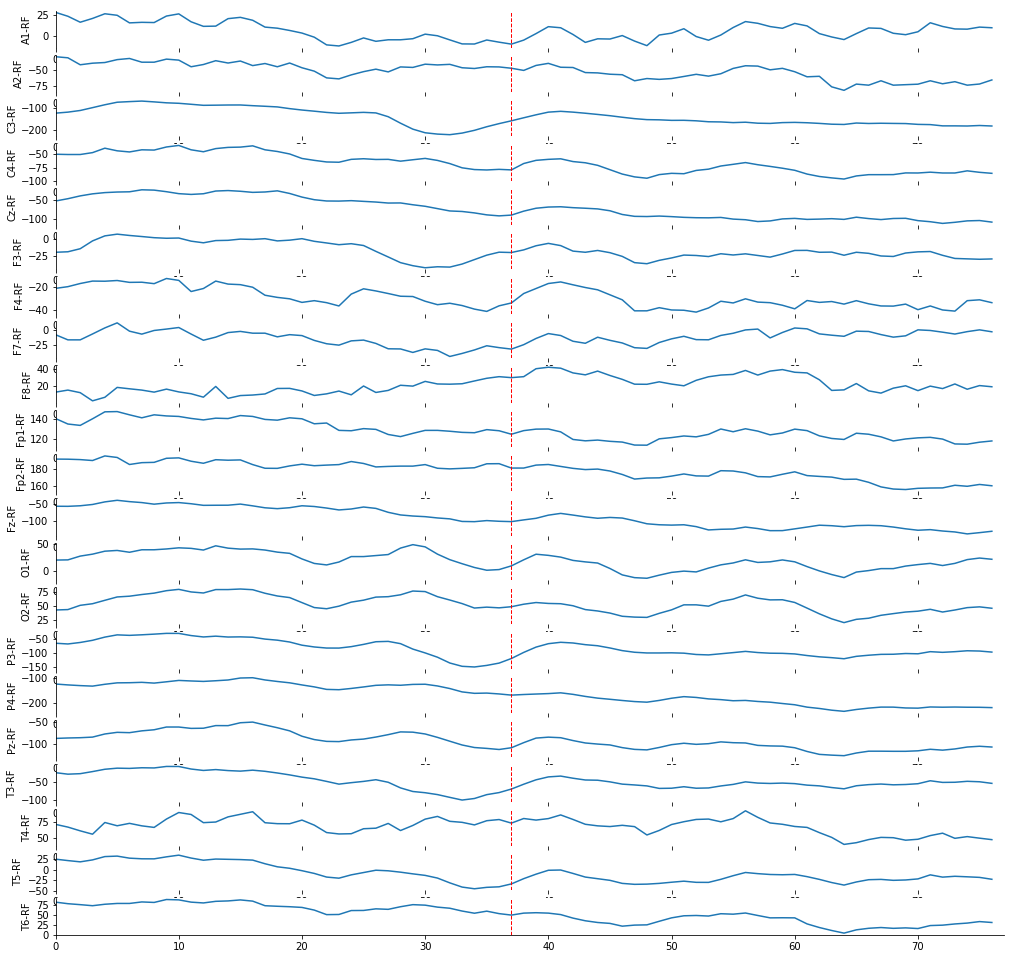

In [206]:
slide = 1926
draw_peaks(d[slide,:,:], peaks = p[slide,:])

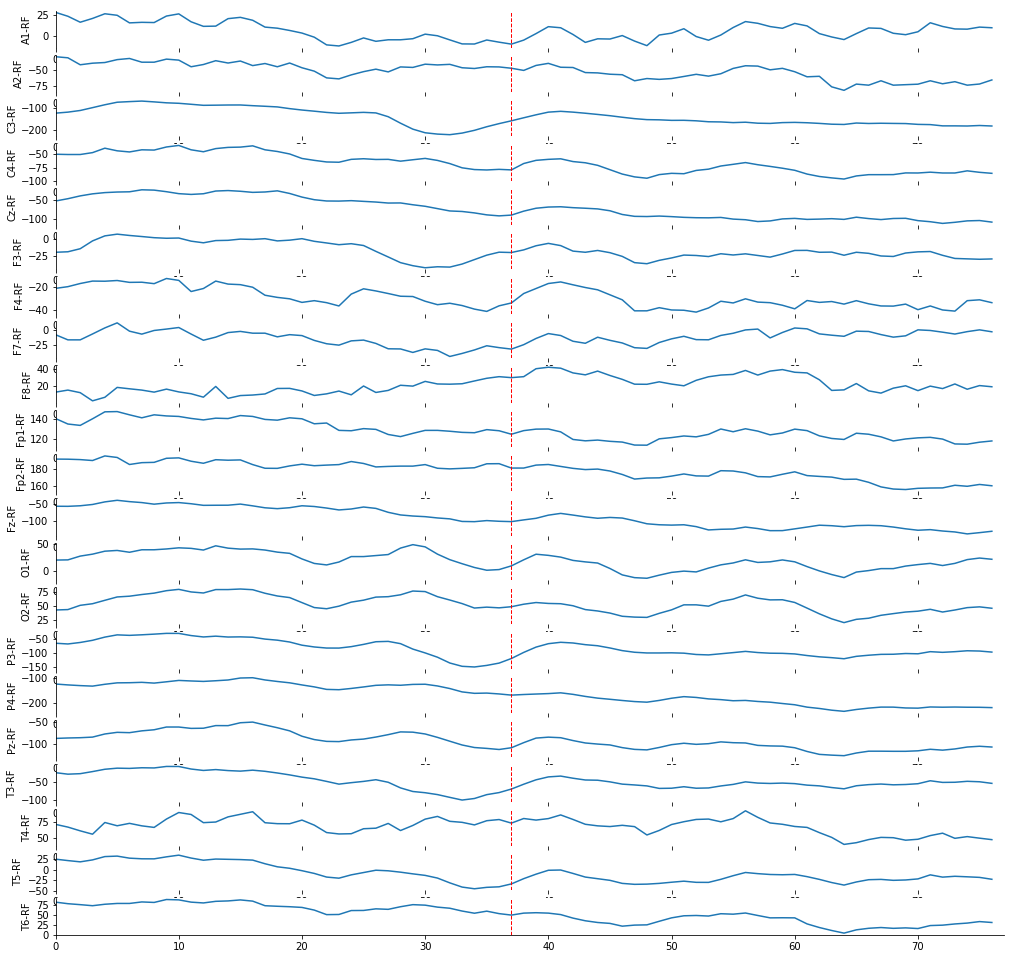

In [207]:
x1 = 538855 + 77 * slide
x2 = 538855 + 77 * (slide + 1)
draw_peaks(rdata[:,x1:x2], peaks = rpeak[x1:x2])

In [159]:
#np.all(d[:,0:77] == rdata[:,538855:(538855 + 77)])
np.all(d[0,:,:] == rdata[:,538855:(538855 + 77)])

True